# airbnb-python-analysis

# *ANALYSING THE NEW YORK CITY AIRBNB OPEN DATA USING PYTHON*

In [21]:
# importing required libraris as their aliases
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

**LOAD FILE DATA**

I am using the New York Airbnb Open Data [2] from Kaggle. I start off by first importing required libraries and then using the Pandas library to load the CSV file. First, a variable for the filepath is declared followed by the dataset which is named nyc.

In [22]:
# Open Dataset
path = 'AB_NYC_2019.csv'
nyc = pd.read_csv(path)

In [32]:
# To view how the data is organized we can simply call the head() property
nyc.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


**TASK 1 - DATA CLEANING**

If there were any null values 'Nan' instead of a numeric or string value in the dataset, then since this may become problematic when we are analysing the dataset, I replaced all these values with 0.

In [31]:
nyc.fillna(0, inplace=True)
nyc.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


**TASK 2 - EXAMINING CHANGE IN PRICE WITH CHANGE IN NEIGHBORHOOD**

Here, I first plot a graph to show the variation of listings with the neighborhood groups.

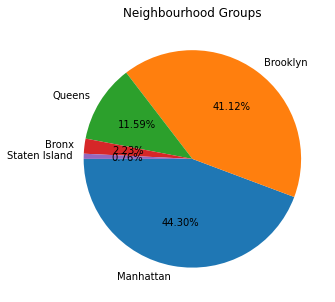

In [25]:
plt.figure(figsize=(10,5))
plt.title("Neighbourhood Groups")
g = plt.pie(nyc.neighbourhood_group.value_counts(), labels = nyc.neighbourhood_group.value_counts().index, autopct = '%1.2f%%', startangle = 180)
plt.show()

As plotted on the piechart, Manhattan had the highest number of listings, followed by Brooklyn, Queens, the Bronx and lastly Staten Island. 

Next, I am plotting a graph to show the average prices by each neighborhood. This will allow me to deduce which neighborhood is higher priced and give me an order for the same. While plotting this graph, I am using the same order as the one specified above for the neighborhoods with most listings.

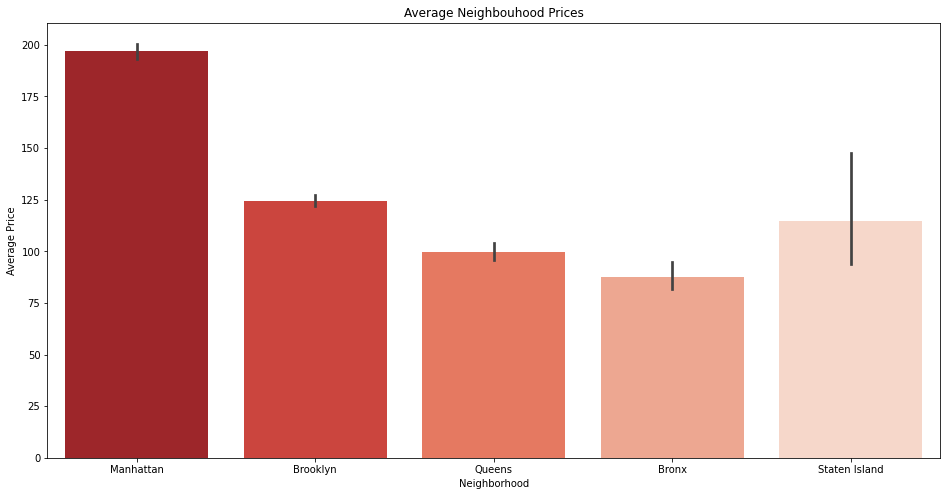

In [30]:
plt.figure(figsize=(16,8))
sns.barplot(data=nyc, x='neighbourhood_group', y='price',
            order=['Manhattan','Brooklyn','Queens', 'Bronx', 'Staten Island'],
            palette = 'Reds_r')
plt.xlabel("Neighborhood",fontdict= {'size':10})
plt.ylabel("Average Price", fontdict= {'size':10})
plt.title("Average Neighbouhood Prices")
plt.show()

Now, as displayed in the above bar graph, Manhattan is the most expensive neighborhood, followed by Brooklyn. This observation coincides with the results for neighborhoods with the most listings.

Next, I have displayed the top 5 and bottom 5 neighbourhoods, according to the Airbnb prices in the same.

In [7]:
print('The Top 5 neighbourhoos according to price are:')
index = nyc.groupby('neighbourhood').neighbourhood.count().sort_values(ascending=False)
print(index.head(5))

The Top 5 neighbourhoos according to price are:
neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Name: neighbourhood, dtype: int64


In [8]:
print('The Bottom 5 neighbourhoos according to price are:')
temp = nyc.groupby('neighbourhood').neighbourhood.count().sort_values(ascending=True)
for i in range(len(temp)):
    if temp[i] < 6:
        #print(temp[i])
        bottom = i

update = temp.drop(temp.index[0:(bottom+1)])
print(update.head(5))

The Bottom 5 neighbourhoos according to price are:
neighbourhood
Bay Terrace      6
Mount Eden       6
Bull's Head      6
Midland Beach    6
Grant City       6
Name: neighbourhood, dtype: int64


**TASK 3 - HEAT MAPS**

For the given data, the set of features I found most interesting was pricing, minimum number of nights, number of reviews, reviews per month, and year round availability. 

I have used he above mentioned fields for a Pearson correlation analysis and plot the corresponding heat map.

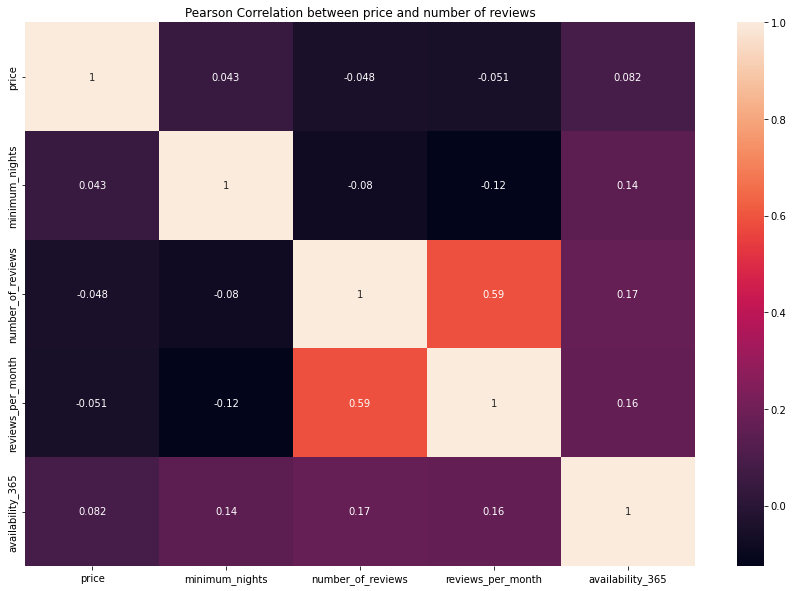

In [9]:
temp = nyc.drop(['id', 'host_id', 'name', 'host_name', 'latitude', 'longitude', 'neighbourhood_group', 'neighbourhood', 'calculated_host_listings_count'], axis=1)
correlation = temp.corr(method='pearson')
plt.figure(figsize=(15, 10))
plt.title('Pearson Correlation between price and number of reviews')
sns.heatmap(correlation, annot=True)
plt.show()

As observed in the heat map, the most positive (strongest) correlation can be seen with the number of reviews per month and the total number of reviews. 

Almost all other correlations are not strong, and the worst among them is between the minimum number of nights at the listing and the number of reviews per month.

**TASK 4 - LATITUDE AND LONGITUDE PLOTS**

In this section, the first scatter plot is based on the latitude and longitude coordinates. In this plot, the points represent the location of an Airbnb, and the points are color-coded based on the neighborhood group feature. 

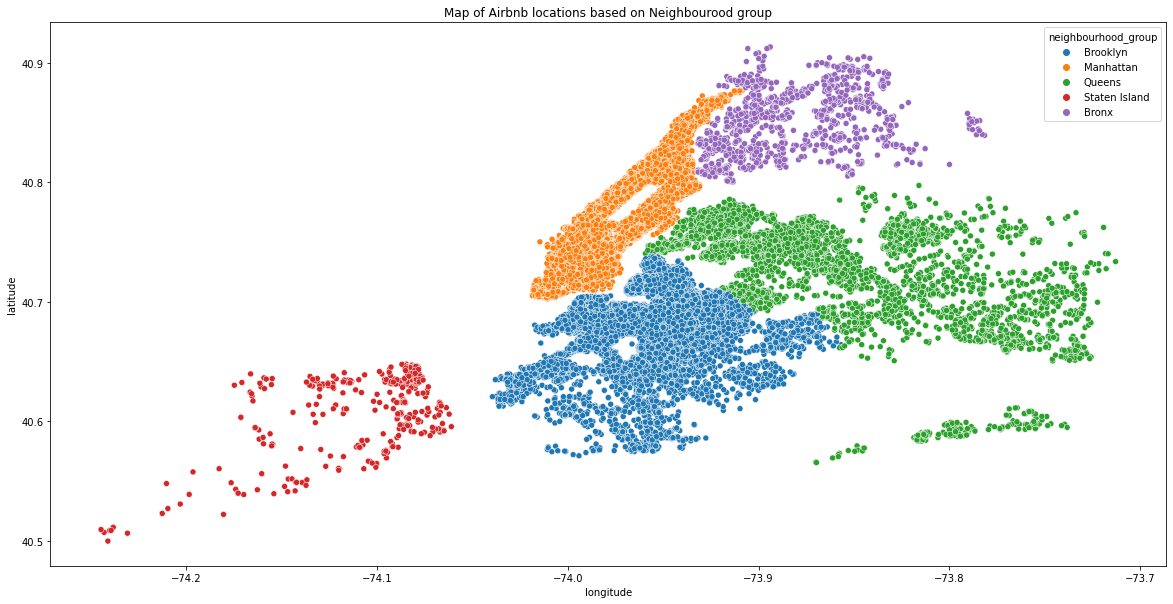

In [10]:
plt.figure(figsize=(20,10))
plt.title('Map of Airbnb locations based on Neighbourood group')
sns.scatterplot( x=nyc.longitude, y=nyc.latitude, hue=nyc.neighbourhood_group)
plt.show()

From the above plot, I observed that the Airbnb location points are more dense in Manhattan and Brooklyn, which is similar to the inference derived in the first task.

In the next plot, I am using the same x and y coordinates and the points represent the locations of the Airbnb listings. However, the points are color coded based on the price of the listings instead of the neighbourhood group.

Map of Airbnb locations based on price of each listing


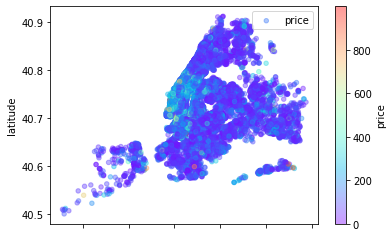

In [11]:
plt.figure(figsize=(20,10))
print('Map of Airbnb locations based on price of each listing')
scatter=nyc[nyc.price<1000].plot(kind='scatter', x='longitude',y='latitude',label='price',c='price',cmap=plt.get_cmap('rainbow'),colorbar=True,alpha=0.4)
scatter.legend()

In the above scatter plot, the red color depicts the most expensive places. After looking at the plot, I came to the conclusion that on average or in general, Manhattan seems to have a higher listing price compared to the other neighbourhood groups. 

**TASK 5 - WORD CLOUD**

In this section, I have extracted the words used in the NYC Airbnb dataset and generated the corresponding word cloud to explore the text data.

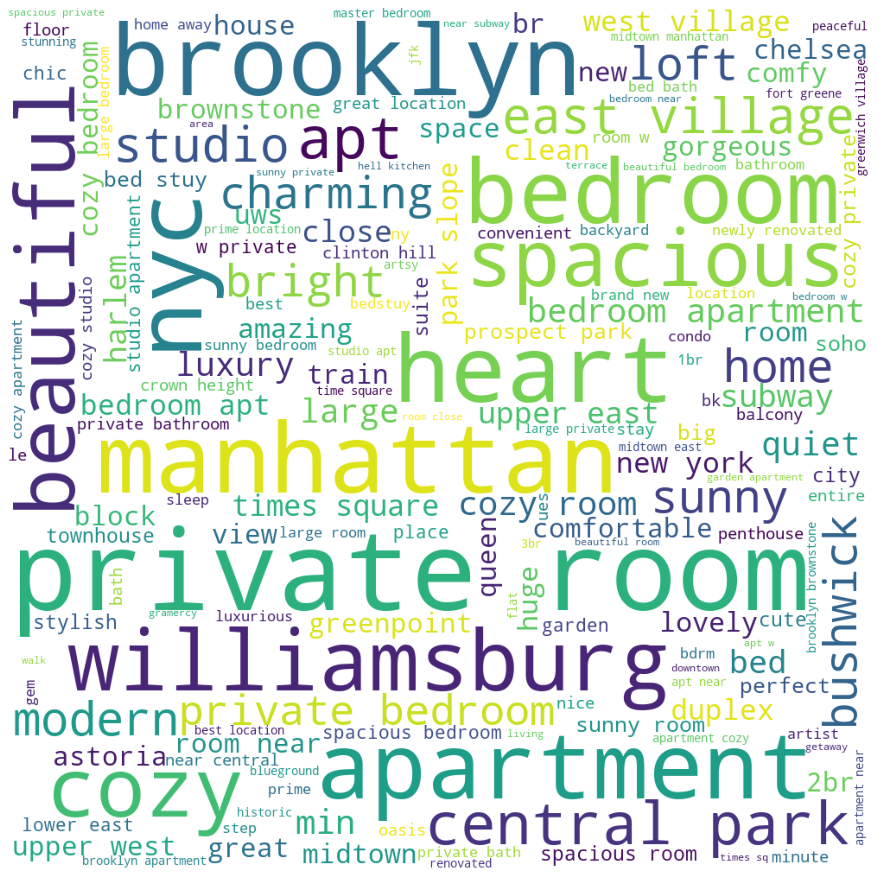

In [12]:
from gensim.parsing.preprocessing import STOPWORDS

words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in nyc.name:     
    # type cast each val to string and split them
    val = str(val)
    tokens = val.split()
    # Converts each token to lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 1000, height = 1000, background_color ='white', stopwords = stopwords, min_font_size = 12).generate(words)

# plot the WordCloud image                      
plt.figure(figsize = (12, 12), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

**TASK 6 - FINDING THE BUSIEST HOSTS**

In this section, I try to determine the busiest hosts, that is, hosts with the highest number of listings.

Here, I first list out the top 10 hosts with the highest number of listings - their host_id, the number of rentals under them and their names.

In [33]:
names = []
busy10 = pd.DataFrame(nyc.groupby('host_id').id.count().sort_values(ascending=False).head(10).reset_index())
busy10.columns = ['host_id','number of rentals']

# Appending the names of the busy hosts to the subset dataframe busyHosts
for i in range(busy10.shape[0]):
    for j in range(len(nyc)):
        if nyc.host_id[j] == busy10.host_id[i]:
            names.append(nyc.host_name[j])
            break

busy10['host_name'] = names
busy10

,host_id,number of rentals,host_name
0,219517861,327,Sonder (NYC)
1,107434423,232,Blueground
2,30283594,121,Kara
3,137358866,103,Kazuya
4,16098958,96,Jeremy & Laura
5,12243051,96,Sonder
6,61391963,91,Corporate Housing
7,22541573,87,Ken
8,200380610,65,Pranjal
9,1475015,52,Mike


In [14]:
# Making a subset of the 10 busiest hosts from original dataframe
hosts = list(busy10.host_id)
top10 = nyc[nyc['host_id'].isin(hosts)]
top10 = pd.DataFrame(top10)

Once I have the list of the top 10 busiest hosts, I next try finding out the reason why these above-mentioned hosts are the busiest.

The first factor I am considering is the neighbourhood group where the listings under each host's name are concentrated.

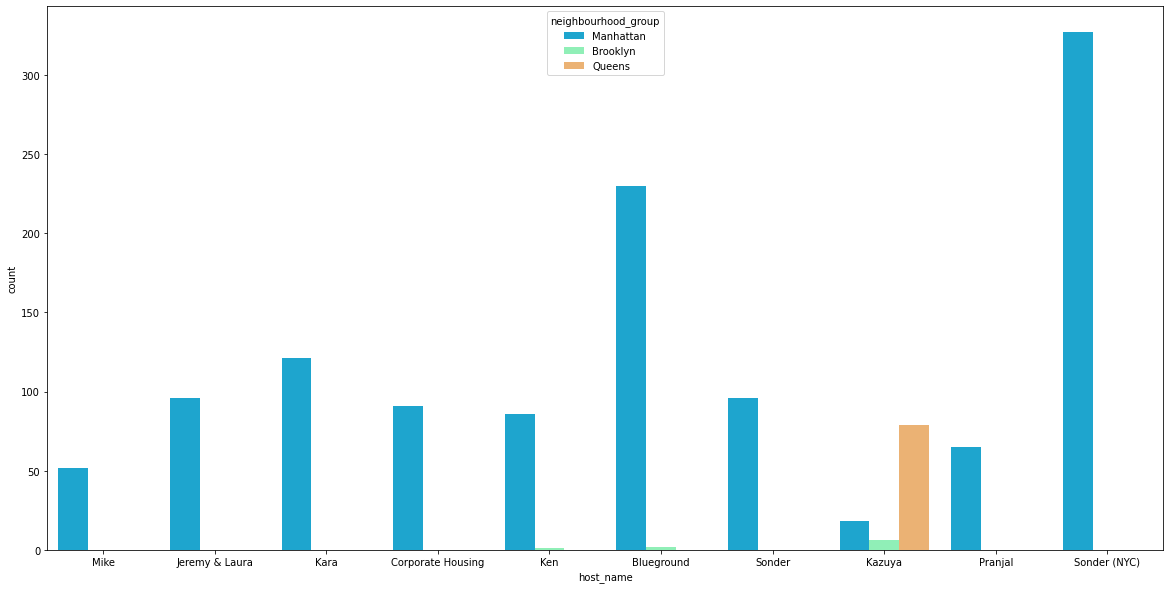

In [15]:
plt.figure(figsize=(20,10))
sns.countplot(x='host_name', data=top10, hue='neighbourhood_group', palette='rainbow')
plt.show()

From the above plot, I come to the conclusion that most of the listings under the top 10 hosts are in Manhattan, which is also the neighbourhood group with most Airbnb listings in general.

The second factor I will use is the pricing each host uses for their listings. I proceed by first calculating the mean price that each host offers and then assuming a total average limit to be $100.

           host_name       price
0         Blueground  303.150862
1  Corporate Housing  146.241758
2     Jeremy & Laura  208.958333
3               Kara  277.528926
4             Kazuya   43.825243
5                Ken  215.436782
6               Mike  103.076923
7            Pranjal  290.230769
8             Sonder  213.031250
9       Sonder (NYC)  253.195719


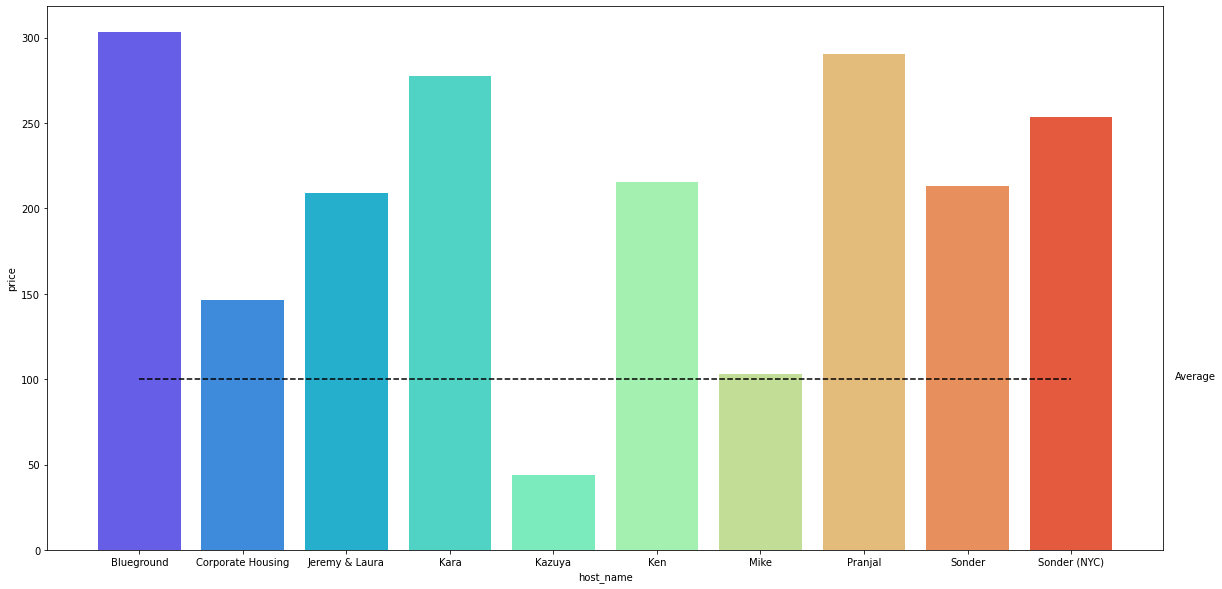

In [16]:
top10_mean = top10.groupby('host_name').price.mean().reset_index()
print(top10_mean)
plt.figure(figsize=(20,10))
sns.barplot(x='host_name', y='price', data=top10_mean, palette='rainbow')

plt.text(10,100,'Average')
plt.plot([100, 100, 100, 100, 100, 100, 100, 100, 100, 100], color='black', linestyle='dashed')
plt.show

From the above bar graph, I conclude that every host, except Kazuya has an average rate over $100. The reason for this is probably because most listings are in the Manhattan area, which as proved before in Task 2 is the most expensive neighbourhood group. Since the neighbourhood is expensive, the hosts try to match their prices to the other listings in the area to gain a profit. This goes with the fact that location is one of the most important factors when thinking about land or real estate.

The next factor I am considering is the number of reviews the host's listings have gotten in total. 

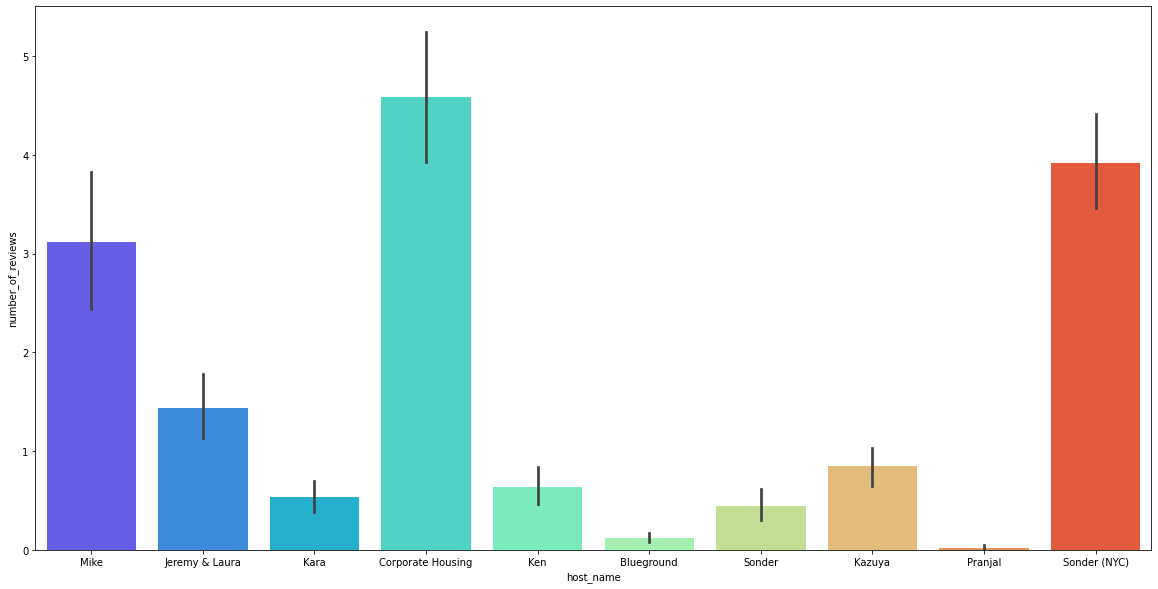

In [27]:
plt.figure(figsize=(20,10))
sns.barplot(x='host_name', y='number_of_reviews', data=top10, palette='rainbow')
plt.show

From the above bar plot, I come to the conclusion that the number of reviews that a listing has, has little to nothing to do with how busy the host is. It can be said to be applicable to only a few hosts, including Corporate Housing, Sonder(NYC), and Mike, in the respective order.

The last factor that I am taking into account is the minimum number of nights that is rented out by the hosts.

           host_name  minimum_nights
0         Blueground       32.198276
1  Corporate Housing       30.329670
2     Jeremy & Laura       30.000000
3               Kara       31.132231
4             Kazuya       30.000000
5                Ken       30.000000
6               Mike       30.000000
7            Pranjal       33.692308
8             Sonder       29.000000
9       Sonder (NYC)       13.311927


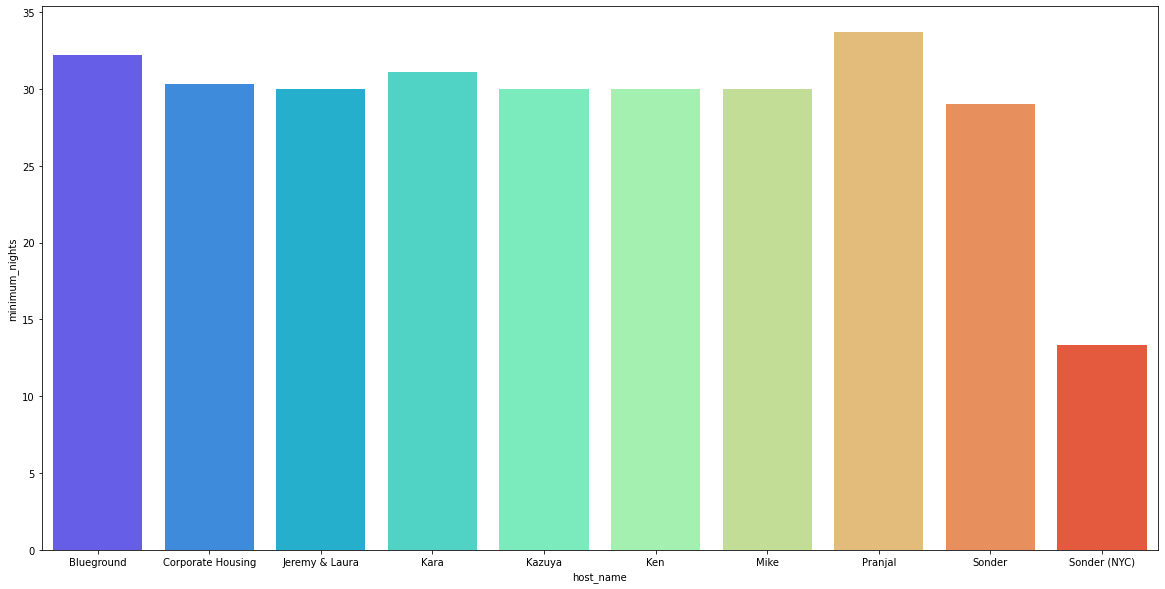

In [28]:
top10_mean = top10.groupby('host_name').minimum_nights.mean().reset_index()
print(top10_mean)
plt.figure(figsize=(20,10))
sns.barplot(x='host_name', y='minimum_nights', data=top10_mean, palette='rainbow')
plt.show

From the above bar plot, I come to the conclusion that almost all the top 10 busiest hosts rent out their listings for at least a month. This means they prefer customers who have a long term plan to explore or stay.

**TASK 7 - PLOTS I FEEL ARE INTERESTING**

For this section, the first set of features I found most interesting was the yearly availability of a listing and the neighbourhood in which the listing is. I assume that the more popular the neighbourhood, that is, more the number of listings in the place, the lesser will be the yearly availability. 

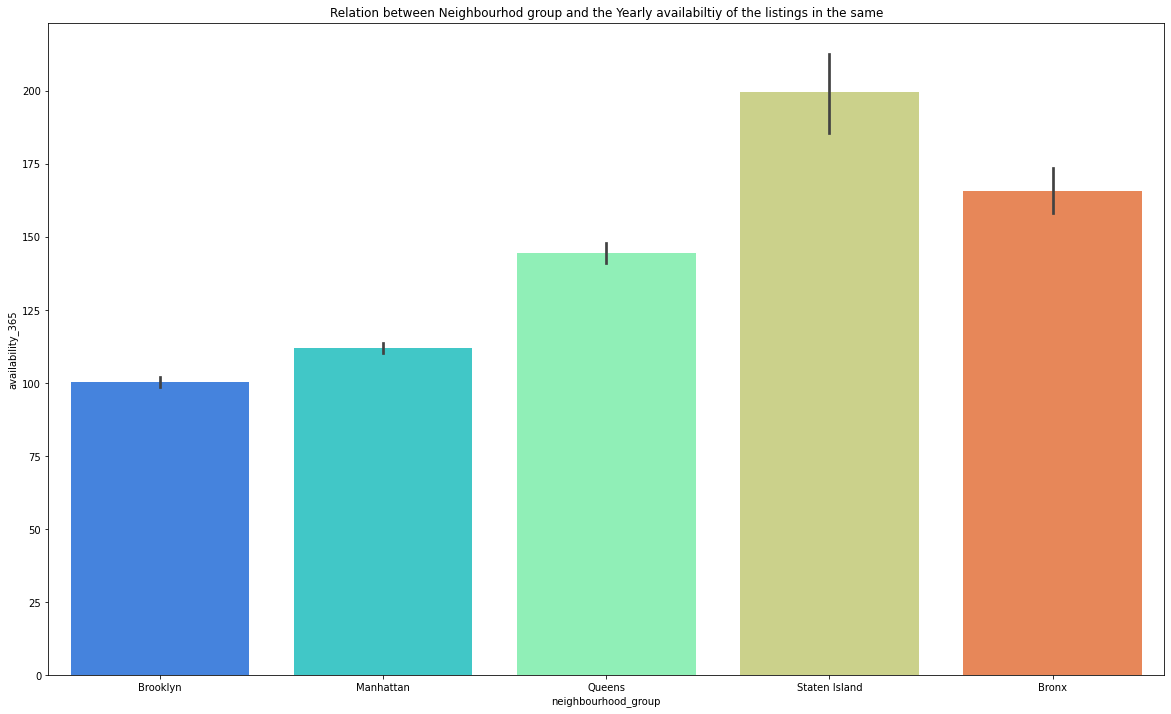

In [29]:
plt.figure(figsize=(20,12))
plt.title('Relation between Neighbourhod group and the Yearly availabiltiy of the listings in the same')
sns.barplot(x='neighbourhood_group',y='availability_365', data=nyc, palette='rainbow')
plt.show()

The assumption I made seems to be correct from the graph plotted out. The more dense neighbourhood groups, Manhattan and Brooklyn, had lesser availability when compared to the neighbourhood group with the least number of listings, Staten Island.

The second feature of the dataset I found interesting was the type of room. I want to know which room type is more popular based on each neighbourhood group. I am using a count plot to satisfy this question.

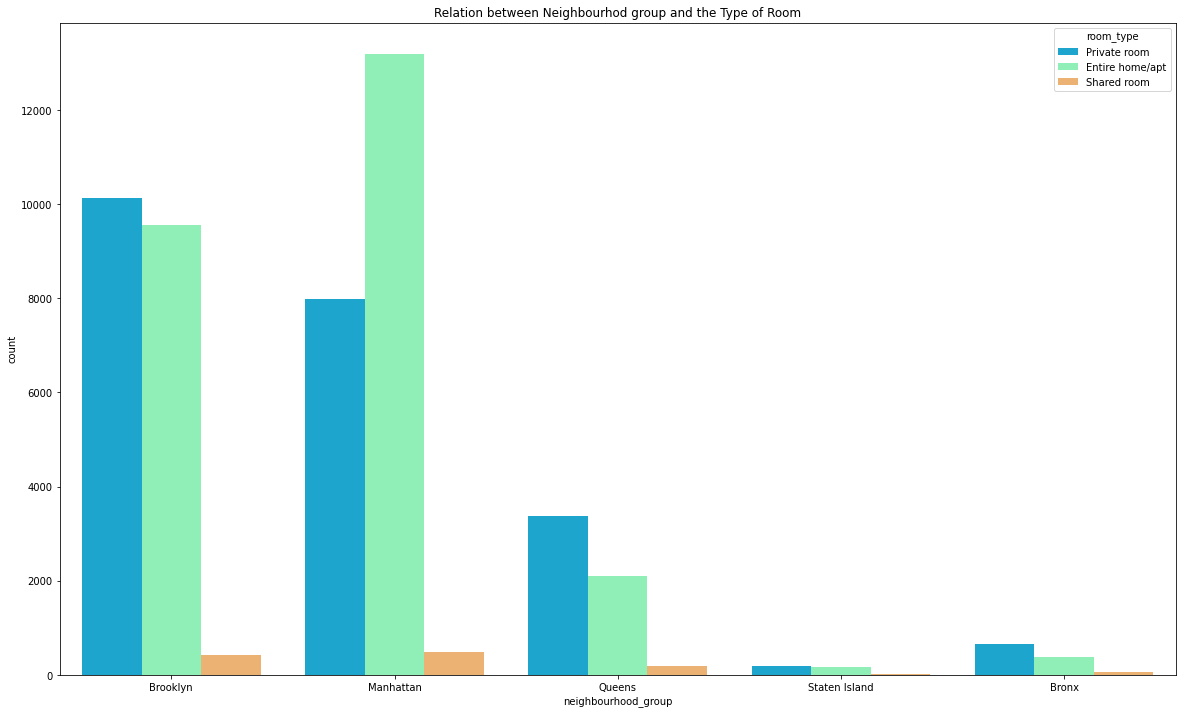

In [20]:
plt.figure(figsize=(20,12))
plt.title('Relation between Neighbourhod group and the Type of Room')
sns.countplot(x=nyc.neighbourhood_group, hue=nyc.room_type, palette='rainbow')
plt.show()

From the above count plot I inferred that the type of room offered depends heavily on the neighbourhood group and the only thing common between the neighbourhood groups is that the number of shared rooms rented out by hosts is very less if not nothing compared to the other room types. In Manhattan, hosts rent out entire homes or apartments almost twice the number of private rooms, and it is the opposite in Queens. On the other hand, in Brooklyn, Staten Island, and the Bronx, both room types are almost equally popular among hosts.